<a href="https://colab.research.google.com/github/jsaulme/Aprendizaje_Automatico_MCD/blob/main/tareas/09_Dise%C3%B1o_Experimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.manifold import TSNE
from operator import ge
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [43]:
url = "https://raw.githubusercontent.com/jsaulme/datasets/main/Global_superstore2018__encoded.csv"
data = pd.read_csv(url)
data.head(3)

,Customer ID,Customer Name,Customer Name_encoded,Product ID,Product ID_encoded,Product Name,Product Name_encoded,Category,Category_encoded_0,Category_encoded_1,...,Market_encoded_3,Market_encoded_4,Region,Region_encoded,Postal Code,Quantity,Discount,Sales,Profit,Ship Cost
0,SC-2057582,Sonia Cooley,0.001111,OFF-LA-4658,0.000273,"Hon File Folder Labels, Adjustable",0.000273,Office Supplies,0,1,...,1,0,Central America,0.109495,0,3,0.0,13.08,4.56,2.033
1,KW-1657028,Kelly Williams,0.001384,FUR-FU-6238,0.000409,"Tenex Clock, Durable",0.000409,Furniture,1,0,...,1,0,South America,0.058257,0,8,0.0,252.16,90.72,13.449
2,KW-1657028,Kelly Williams,0.001384,FUR-BO-4845,0.000331,"Ikea 3-Shelf Cabinet, Mobile",0.000331,Furniture,1,0,...,1,0,South America,0.058257,0,2,0.0,193.28,54.08,9.627


In [44]:
data.dtypes

Customer ID                  object
Customer Name                object
Customer Name_encoded       float64
Product ID                   object
Product ID_encoded          float64
Product Name                 object
Product Name_encoded        float64
Category                     object
Category_encoded_0            int64
Category_encoded_1            int64
Category_encoded_2            int64
Sub-Category                 object
Sub-Category_encoded        float64
Segment                      object
Segment_encoded_0             int64
Segment_encoded_1             int64
Segment_encoded_2             int64
Order ID                     object
Order Priority               object
Order Priority_encoded_0      int64
Order Priority_encoded_1      int64
Order Priority_encoded_2      int64
Order Priority_encoded_3      int64
Order Date                   object
Order Day                     int64
Order Month                   int64
Order Year                    int64
Ship Mode                   

In [45]:
# Filtrar valores negativos de "Profit"
data_negative_profit = data[data['Profit'] < 0]
data_negative_profit.head(3).iloc[:,50:]

,Region_encoded,Postal Code,Quantity,Discount,Sales,Profit,Ship Cost
16,0.109495,0,2,0.4,18.840,-6.600,1.602
17,0.109495,0,7,0.4,308.280,-149.100,27.770
18,0.109495,0,2,0.4,40.176,-6.064,2.137


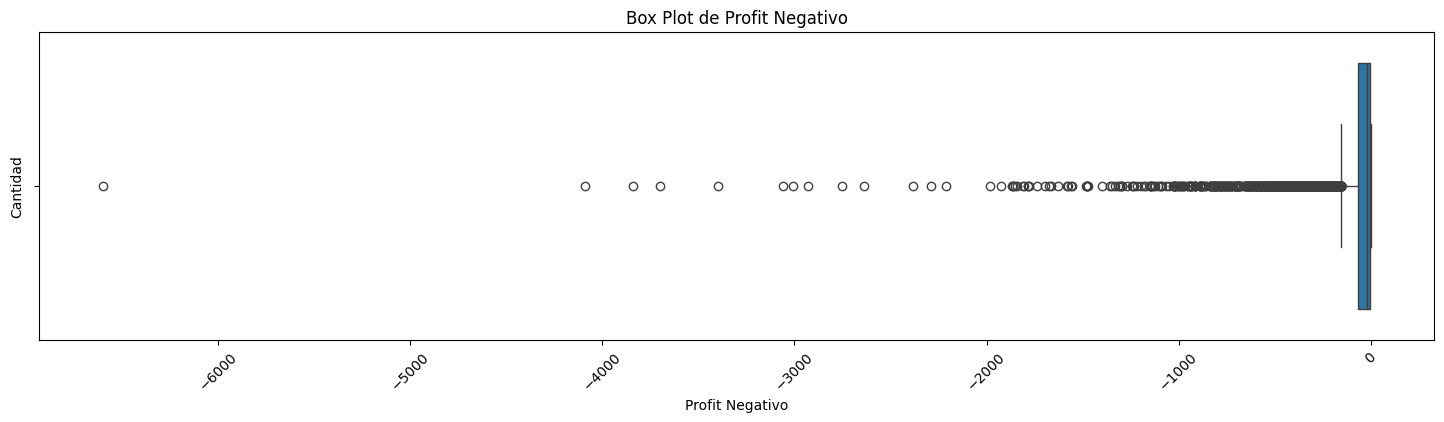

In [55]:
# # Exploración inicial
# plt.figure(figsize=(18, 4))
# sns.histplot(data_negative_profit['Profit'])
# plt.title('Distribución de Profit Negativo')
# plt.show()

plt.figure(figsize=(18, 4))
sns.boxplot(x=data_negative_profit['Profit'])
plt.xlabel('Profit Negativo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.title('Box Plot de Profit Negativo')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


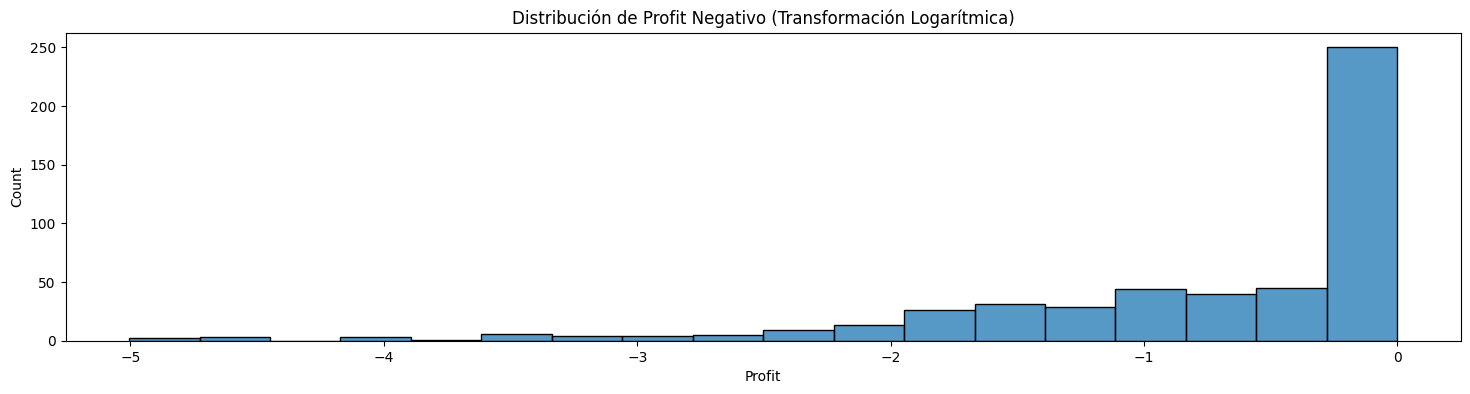

In [47]:
plt.figure(figsize=(18, 4))
sns.histplot(np.log1p(data_negative_profit['Profit']))  # np.log1p es log(1 + x) para manejar valores de cero y negativos
plt.title('Distribución de Profit Negativo (Transformación Logarítmica)')
plt.show()

In [48]:
# Seleccionar características numéricas para explorar su relación con Profit
features = ["City_encoded", "State_encoded", "Country_encoded", "Market_encoded_0", "Market_encoded_1", "Market_encoded_2", "Market_encoded_3", "Market_encoded_4", "Region_encoded"]
geografic_data = data_negative_profit[features] # Usar los nombres de las columnas para seleccionar los datos
geografic_data.head(3).iloc[:,5:]

,Market_encoded_2,Market_encoded_3,Market_encoded_4,Region_encoded
16,0,1,0,0.109495
17,0,1,0,0.109495
18,0,1,0,0.109495


In [49]:
# Verificar si hay valores nulos
geografic_data.isnull().sum(), geografic_data.dtypes

(City_encoded        0
 State_encoded       0
 Country_encoded     0
 Market_encoded_0    0
 Market_encoded_1    0
 Market_encoded_2    0
 Market_encoded_3    0
 Market_encoded_4    0
 Region_encoded      0
 dtype: int64,
 City_encoded        float64
 State_encoded       float64
 Country_encoded     float64
 Market_encoded_0      int64
 Market_encoded_1      int64
 Market_encoded_2      int64
 Market_encoded_3      int64
 Market_encoded_4      int64
 Region_encoded      float64
 dtype: object)

In [50]:
# Normaliza el dataset

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar las columnas numéricas
scaler.fit_transform(geografic_data)

# Verificar los datos normalizados
geografic_data.head()


,City_encoded,State_encoded,Country_encoded,Market_encoded_0,Market_encoded_1,Market_encoded_2,Market_encoded_3,Market_encoded_4,Region_encoded
16,0.002613,0.006337,0.007565,0,0,0,1,0,0.109495
17,0.002613,0.006337,0.007565,0,0,0,1,0,0.109495
18,0.002613,0.006337,0.007565,0,0,0,1,0,0.109495
19,0.002613,0.006337,0.007565,0,0,0,1,0,0.109495
23,0.003042,0.006337,0.007565,0,0,0,1,0,0.109495


In [53]:
from operator import ge
# Aplica DBSCAN
from sklearn.cluster import DBSCAN

# Crear un objeto DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Ajustar DBSCAN al conjunto de datos normalizados
dbscan.fit(geografic_data)

# Obtener las etiquetas de cluster asignadas
labels = dbscan.labels_

# Utiliza '.loc' para asignar las etiquetas de cluster directamente en 'geografic_data'
geografic_data.loc[:, 'DB_Cluster'] = labels

# Verifica que la columna 'DB_Cluster' se haya agregado correctamente
geografic_data['DB_Cluster'].unique(), geografic_data.head(3).iloc[:,5:]

# Muestra los valores unicos de la columna DB_Cluster

,Market_encoded_2,Market_encoded_3,Market_encoded_4,Region_encoded,DB_Cluster
16,0,1,0,0.109495,0
17,0,1,0,0.109495,0
18,0,1,0,0.109495,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

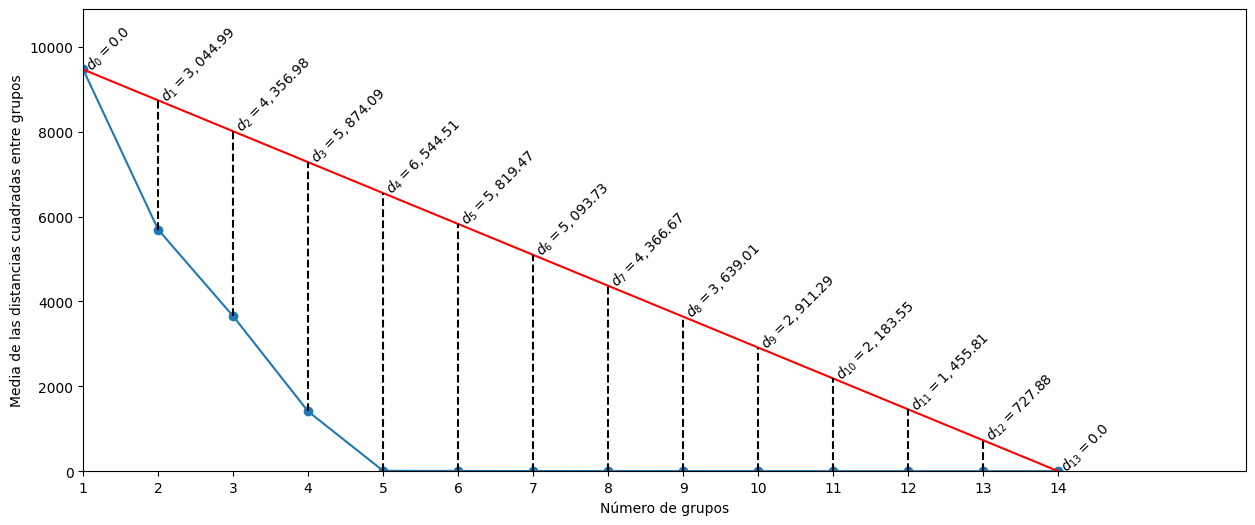

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Definir el rango de valores de K para los que quieres calcular la variación dentro del clúster
K_range = range(1, 15)

# Inicializar una lista para almacenar los valores de la variación dentro del clúster para cada K
inertia = []

# Para cada valor de K, ajustar un modelo KMeans y agregar la variación dentro del clúster a la lista de inercia
for K in K_range:
    model = KMeans(n_clusters=K)
    model.fit(geografic_data.drop('DB_Cluster', axis=1))
    inertia.append(model.inertia_)

# Si el valor mínimo de inercia es negativo, ajustar los valores de inercia sumándoles el valor absoluto del mínimo
if min(inertia) < 0:
    inertia = [i + abs(min(inertia)) for i in inertia]

# Calcular la línea de referencia (desde el primer hasta el último punto de la gráfica del codo)
m = (inertia[0] - inertia[-1]) / (K_range[0] - K_range[-1])
b = inertia[0] - m * K_range[0]

# Crear un DataFrame para almacenar los valores de K e inercia
df_inertias = pd.DataFrame({'n_clusters': K_range, 'inertia': inertia})

# Graficar la variación dentro del clúster en función de K, la línea de referencia y las distancias
plt.figure(figsize=(15, 6))
plt.plot(df_inertias.n_clusters, df_inertias.inertia, marker='o', label='Inercia')
plt.plot(df_inertias.iloc[[0, -1], :].n_clusters, df_inertias.iloc[[0, -1], :].inertia, c='r')
for i, r in df_inertias.iterrows():
    d = '$d_{' + str(i) + '}' + f' = {abs(round(r.inertia - (m * r.n_clusters + b), 2)):,}$'
    plt.annotate(d, xytext=(r.n_clusters, m * r.n_clusters + b), xy=(r.n_clusters, m * r.n_clusters + b), rotation = 45)
    plt.plot([r.n_clusters, r.n_clusters], [r.inertia, m * r.n_clusters + b], '--k')
plt.xlabel('Número de grupos')
plt.ylabel('Media de las distancias cuadradas entre grupos')
plt.xlim((1.5, 16.5))
plt.ylim((0, 1.15 * max(inertia)))  # Ajustar el límite superior del eje y al valor máximo de inercia
plt.xticks(range(1, 15))
plt.show()

print(f'El numero ideal de clusters es: {cluster}')

In [62]:
# Aplica KMeans
from sklearn.cluster import KMeans

# Crear un objeto KMeans
kmeans = KMeans(n_clusters=5)

# Ajustar KMeans al conjunto de datos normalizados
kmeans.fit(geografic_data)

# Obtener las etiquetas de cluster asignadas
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame original
geografic_data['KMeans_Cluster'] = labels

# Muestra los valores unicos de la columna "Cluster"
geografic_data['KMeans_Cluster'].unique()

geografic_data.head(3).iloc[:,5:]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-62-7c881da5da42>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geografic_data['KMeans_Cluster'] = labels


,Market_encoded_2,Market_encoded_3,Market_encoded_4,Region_encoded,DB_Cluster,KMeans_Cluster
16,0,1,0,0.109495,0,2
17,0,1,0,0.109495,0,2
18,0,1,0,0.109495,0,2


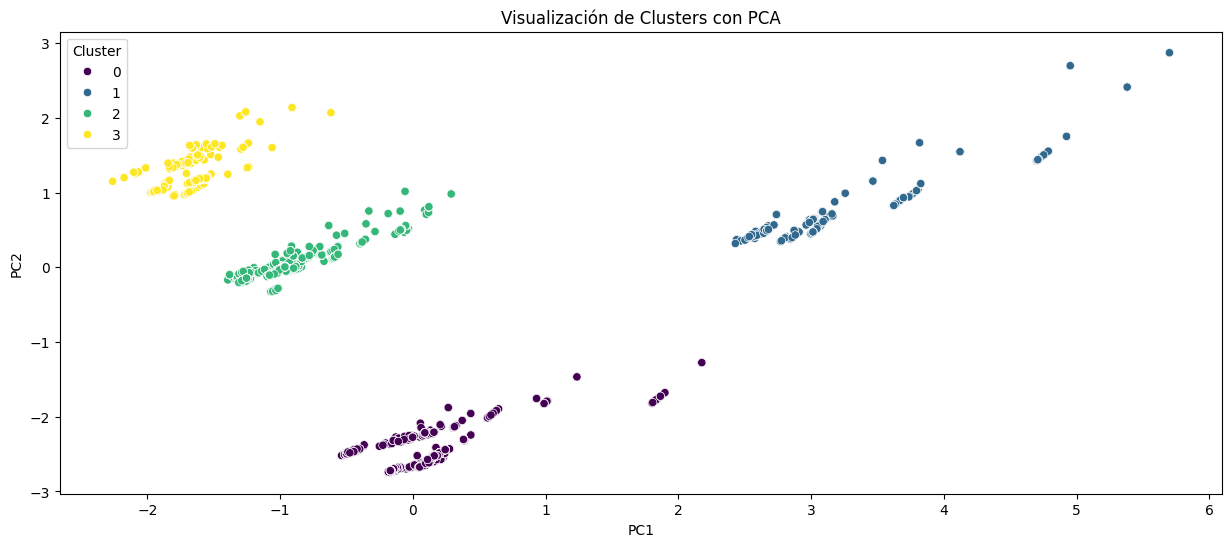

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Crear una instancia de PCA para reducir a 2 componentes
pca = PCA(n_components=2)

# Ajustar y transformar los datos
geografic_data_pca = pca.fit_transform(geografic_data_scaled)

# Convertir los resultados a un DataFrame
geografic_data_pca = pd.DataFrame(geografic_data_pca, columns=['PC1', 'PC2'])

# Asumiendo que 'KMeans_Cluster' es la columna que quieres usar de 'geografic_data'
geografic_data_pca['Cluster'] = geografic_data['KMeans_Cluster'].values

# Visualizar los clusters en un gráfico de dispersión
plt.figure(figsize=(15, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=geografic_data_pca)
plt.title('Visualización de Clusters con PCA')
plt.show()

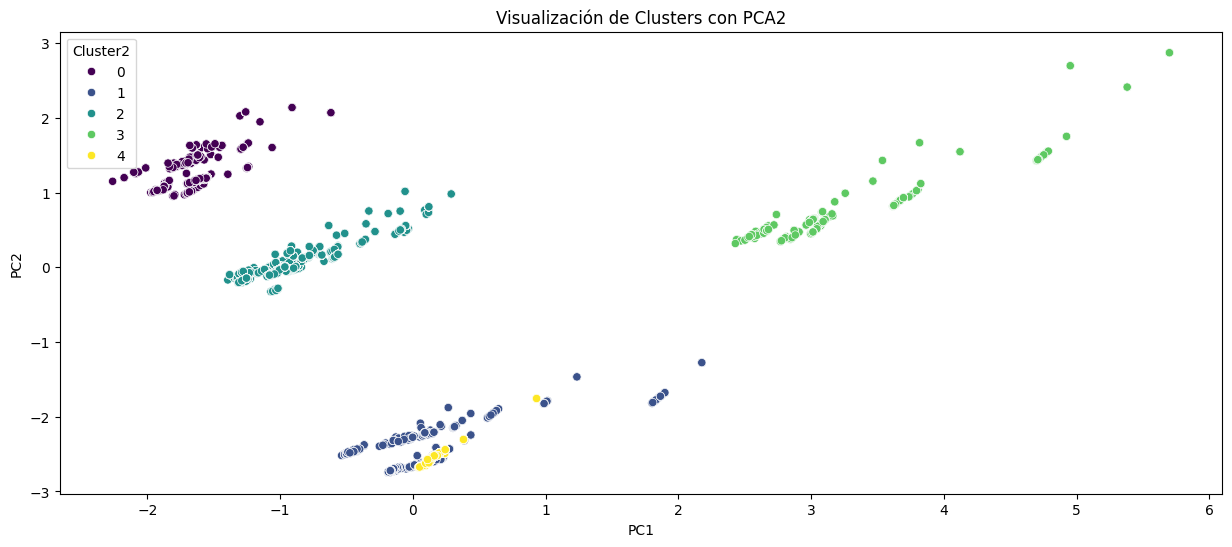

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Crear una instancia de PCA para reducir a 2 componentes
pca2 = PCA(n_components=2)

# Ajustar y transformar los datos
geografic_data_pca2 = pca2.fit_transform(geografic_data_scaled)

# Convertir los resultados a un DataFrame
geografic_data_pca2 = pd.DataFrame(geografic_data_pca2, columns=['PC1', 'PC2'])

# Asumiendo que 'DB_Cluster' es la columna que quieres usar de 'geografic_data'
geografic_data_pca2['Cluster2'] = geografic_data['DB_Cluster'].values

# Visualizar los clusters en un gráfico de dispersión
plt.figure(figsize=(15, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster2', palette='viridis', data=geografic_data_pca2)
plt.title('Visualización de Clusters con PCA2')
plt.show()

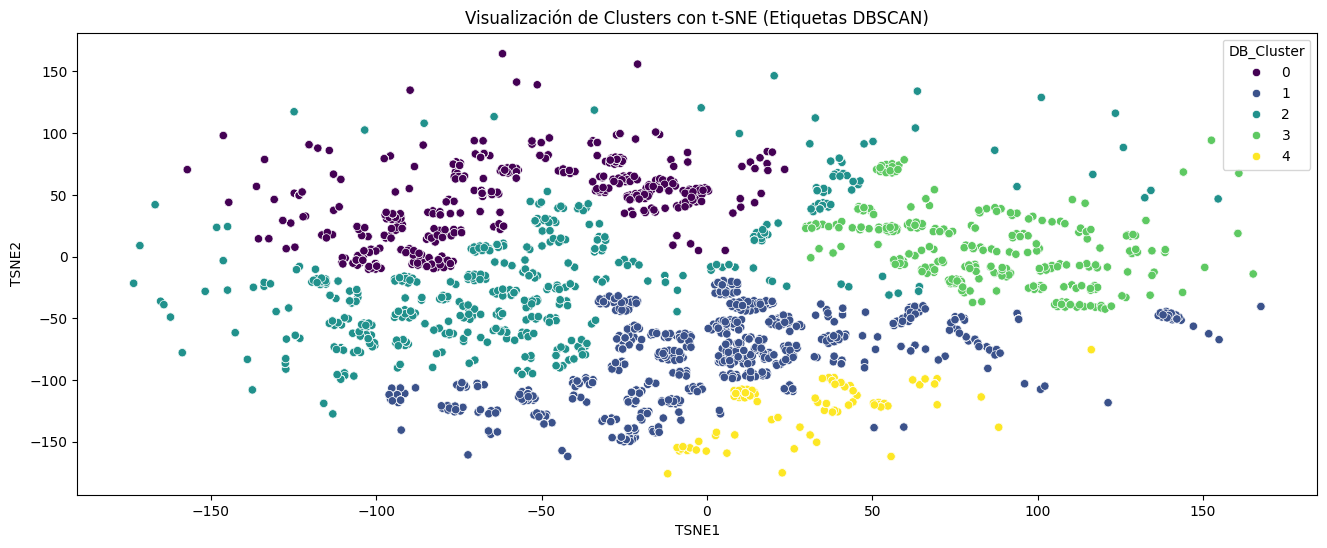

In [67]:
# Crear una instancia de t-SNE
tsne2 = TSNE(n_components=2)

# Ajustar y transformar los datos (esto puede tomar tiempo)
geografic_data_tsne2 = tsne2.fit_transform(geografic_data_scaled)

# Convertir los resultados a un DataFrame
geografic_data_tsne2 = pd.DataFrame(geografic_data_tsne2, columns=['TSNE1', 'TSNE2'])

# Agregar los clusters de DBSCAN al DataFrame reducido
geografic_data_tsne2['DB_Cluster'] = geografic_data['DB_Cluster'].values  # Asegúrate de usar el nombre correcto de la columna

# Visualizar los clusters en un gráfico de dispersión
plt.figure(figsize=(16, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='DB_Cluster', data=geografic_data_tsne2, palette='viridis')
plt.title('Visualización de Clusters con t-SNE (Etiquetas DBSCAN)')
plt.show()

In [73]:
geografic_data.columns

Index(['City_encoded', 'State_encoded', 'Country_encoded', 'Market_encoded_0',
       'Market_encoded_1', 'Market_encoded_2', 'Market_encoded_3',
       'Market_encoded_4', 'Region_encoded', 'DB_Cluster', 'KMeans_Cluster'],
      dtype='object')

In [76]:
# Unir los DataFrames
geografic_data = geografic_data.merge(data_negative_profit[['Profit']], left_index=True, right_index=True)


   DB_Cluster     Profit
0           0 -61.459290
1           1 -90.016196
2           2 -65.871375
3           3 -83.448042
4           4 -86.286440


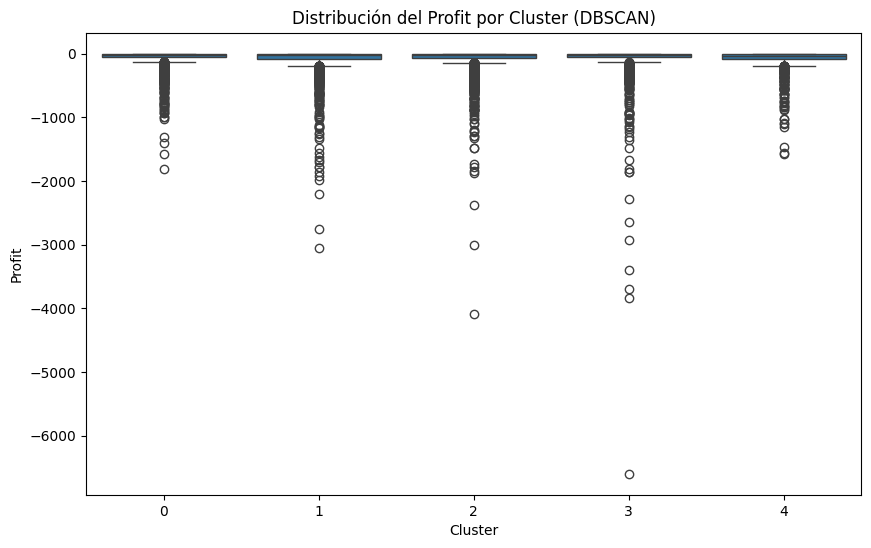

In [83]:
# Calcular el profit promedio por cluster de DBSCAN
cluster_analysis_db = geografic_data.groupby('DB_Cluster')['Profit'].mean().reset_index()
print(cluster_analysis_db)

# Visualiza la distribución del profit por cluster de DBSCAN
plt.figure(figsize=(10, 6))
sns.boxplot(x='DB_Cluster', y='Profit', data=geografic_data)
plt.title('Distribución del Profit por Cluster (DBSCAN)')
plt.xlabel('Cluster')
plt.ylabel('Profit')
plt.show()

# # Gráfico de barras para profit promedio por cluster de DBSCAN
# plt.figure(figsize=(18, 6))
# sns.barplot(x='DB_Cluster', y='Profit', data=cluster_analysis_db, palette='viridis')
# plt.title('Profit Promedio por Cluster (DBSCAN)')
# plt.xlabel('Cluster')
# plt.ylabel('Profit Promedio')
# plt.show()

   KMeans_Cluster     Profit
0               0 -86.286440
1               1 -65.871375
2               2 -61.459290
3               3 -90.016196
4               4 -83.448042


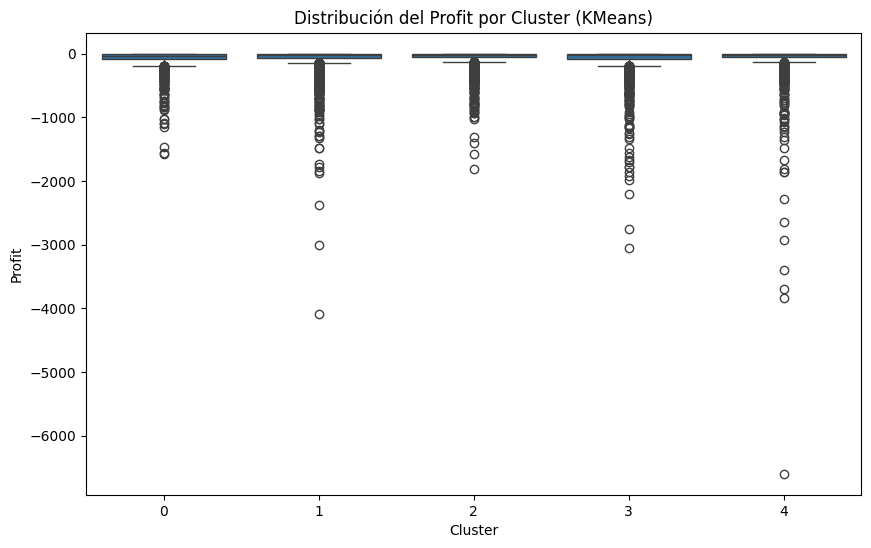

In [78]:
# Calcular el profit promedio por cluster de KMeans
cluster_analysis_kmeans = geografic_data.groupby('KMeans_Cluster')['Profit'].mean().reset_index()
print(cluster_analysis_kmeans)

# Visualiza la distribución del profit por cluster de KMeans
plt.figure(figsize=(10, 6))
sns.boxplot(x='KMeans_Cluster', y='Profit', data=geografic_data)
plt.title('Distribución del Profit por Cluster (KMeans)')
plt.xlabel('Cluster')
plt.ylabel('Profit')
plt.show()


In [87]:
# Convertir 'Order Date' a datetime
data_negative_profit.loc[:, 'Order Date'] = pd.to_datetime(data_negative_profit['Order Date'])

# Unir 'Order Date' a geografic_data
geografic_data = geografic_data.merge(data_negative_profit[['Order Date', 'Profit']], left_index=True, right_index=True)

In [88]:
# Descripción estadística de las características demográficas por cluster de KMeans
cluster_description_kmeans = geografic_data.groupby('KMeans_Cluster')[features].mean().reset_index()
print("Descripción estadística de las características demográficas por cluster de KMeans:")
print(cluster_description_kmeans)

# Descripción estadística de las características demográficas por cluster de DBSCAN
cluster_description_db = geografic_data.groupby('DB_Cluster')[features].mean().reset_index()
print("Descripción estadística de las características demográficas por cluster de DBSCAN:")
print(cluster_description_db)

Descripción estadística de las características demográficas por cluster de KMeans:
   KMeans_Cluster  City_encoded  State_encoded  Country_encoded  \
0               0      0.002613       0.002662         0.015673   
1               1      0.002469       0.004995         0.025250   
2               2      0.002648       0.003680         0.018004   
3               3      0.000964       0.006022         0.024594   
4               4      0.004160       0.013051         0.194853   

   Market_encoded_0  Market_encoded_1  Market_encoded_2  Market_encoded_3  \
0               1.0               0.0               0.0               0.0   
1               0.0               1.0               0.0               0.0   
2               0.0               0.0               0.0               1.0   
3               0.0               0.0               1.0               0.0   
4               0.0               0.0               0.0               0.0   

   Market_encoded_4  Region_encoded  
0            

In [89]:
# Examinar los clusters con mayor profit negativo (KMeans)
worst_clusters_kmeans = geografic_data.groupby('KMeans_Cluster')['Profit'].mean().sort_values().head().reset_index()
print("Clusters de KMeans con mayor profit negativo:")
print(worst_clusters_kmeans)

# Examinar los clusters con mayor profit negativo (DBSCAN)
worst_clusters_db = geografic_data.groupby('DB_Cluster')['Profit'].mean().sort_values().head().reset_index()
print("Clusters de DBSCAN con mayor profit negativo:")
print(worst_clusters_db)


Clusters de KMeans con mayor profit negativo:
   KMeans_Cluster     Profit
0               3 -90.016196
1               0 -86.286440
2               4 -83.448042
3               1 -65.871375
4               2 -61.459290
Clusters de DBSCAN con mayor profit negativo:
   DB_Cluster     Profit
0           1 -90.016196
1           4 -86.286440
2           3 -83.448042
3           2 -65.871375
4           0 -61.459290


In [92]:
# Asegúrate de que 'Order Date_x' esté en formato datetime en el DataFrame principal
geografic_data['Order Date_x'] = pd.to_datetime(geografic_data['Order Date_x'])

# Identificar clusters con mayor impacto en el profit negativo (DBSCAN)
high_impact_clusters_db = geografic_data[geografic_data['DB_Cluster'].isin(worst_clusters_db['DB_Cluster'])]

# Identificar clusters con mayor impacto en el profit negativo (KMeans)
high_impact_clusters_kmeans = geografic_data[geografic_data['KMeans_Cluster'].isin(worst_clusters_kmeans['KMeans_Cluster'])]

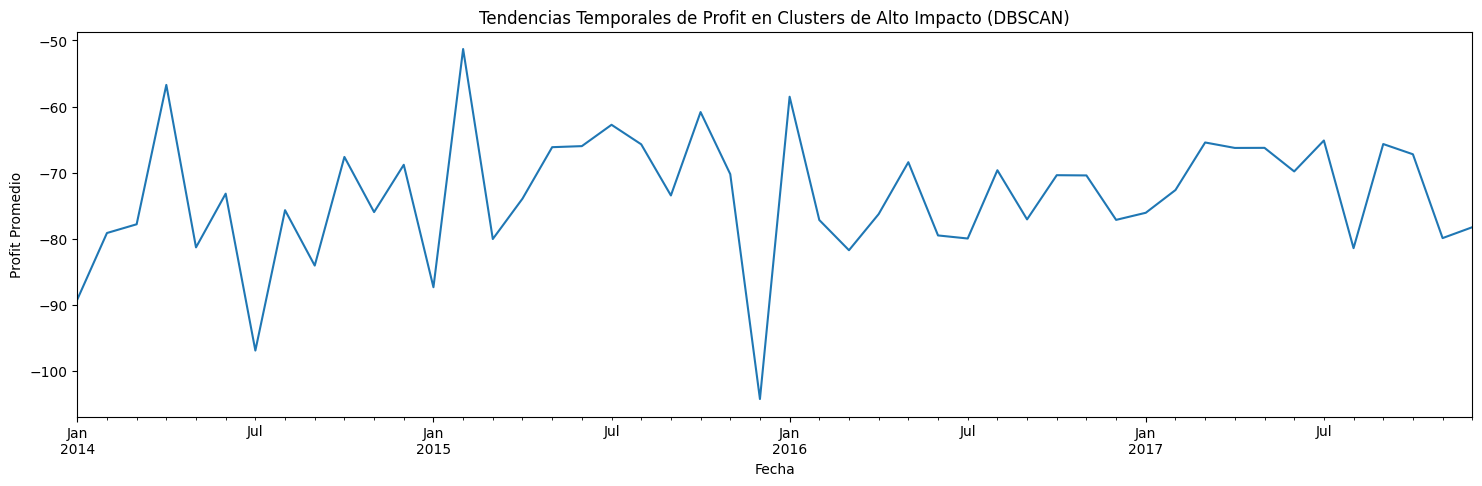

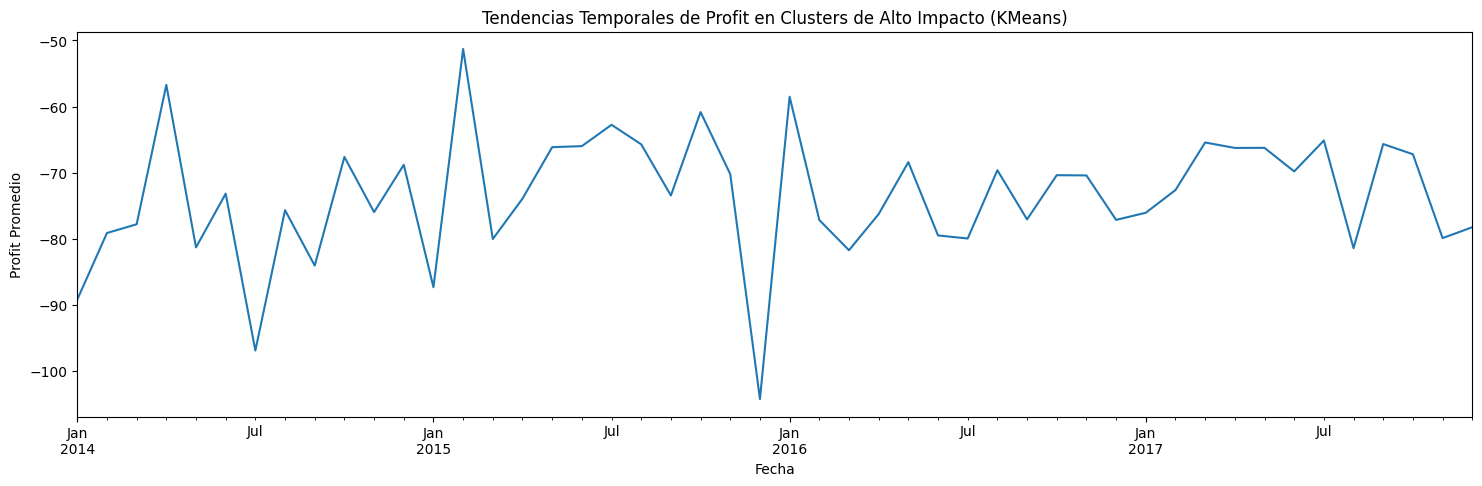

In [110]:
# Analizar tendencias temporales de clusters de alto impacto (DBSCAN)
high_impact_clusters_db.set_index('Order Date_y', inplace=False)
high_impact_clusters_db.resample('M')['Profit'].mean().plot(figsize=(18, 5), title='Tendencias Temporales de Profit en Clusters de Alto Impacto (DBSCAN)')
plt.ylabel('Profit Promedio')
plt.xlabel('Fecha')
plt.show()

# Analizar tendencias temporales de clusters de alto impacto (KMeans)
high_impact_clusters_kmeans.set_index('Order Date_y', inplace=False)
high_impact_clusters_kmeans.resample('M')['Profit'].mean().plot(figsize=(18, 5), title='Tendencias Temporales de Profit en Clusters de Alto Impacto (KMeans)')
plt.ylabel('Profit Promedio')
plt.xlabel('Fecha')
plt.show()

In [113]:
# Revisar los primeros registros de cada DataFrame
print("Primeros registros de high_impact_clusters_db:")
print(high_impact_clusters_db.head())

print("Primeros registros de high_impact_clusters_kmeans:")
print(high_impact_clusters_kmeans.head())

# Revisar los valores únicos de los clusters en cada DataFrame
print("Clusters únicos en high_impact_clusters_db:")
print(high_impact_clusters_db['DB_Cluster'].unique())

print("Clusters únicos en high_impact_clusters_kmeans:")
print(high_impact_clusters_kmeans['KMeans_Cluster'].unique())


Primeros registros de high_impact_clusters_db:
              City_encoded  State_encoded  Country_encoded  Market_encoded_0  \
Order Date_x                                                                   
2016-06-26        0.002613       0.006337         0.007565                 0   
2016-06-26        0.002613       0.006337         0.007565                 0   
2016-06-26        0.002613       0.006337         0.007565                 0   
2016-06-26        0.002613       0.006337         0.007565                 0   
2017-10-03        0.003042       0.006337         0.007565                 0   

              Market_encoded_1  Market_encoded_2  Market_encoded_3  \
Order Date_x                                                         
2016-06-26                   0                 0                 1   
2016-06-26                   0                 0                 1   
2016-06-26                   0                 0                 1   
2016-06-26                   0            

In [114]:
# Muestra las etiquetas de KMeans
geografic_data['KMeans_Cluster'].unique()

array([2, 3, 1, 4, 0], dtype=int32)

In [115]:
# Muestra las etiquetas de DBScan
geografic_data['DB_Cluster'].unique()

array([0, 1, 2, 3, 4])

In [123]:
#dbscan.labels_.unique()
np.unique(dbscan.labels_)

array([0, 1, 2, 3, 4])

In [124]:
#kmeans.labels_.shape
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

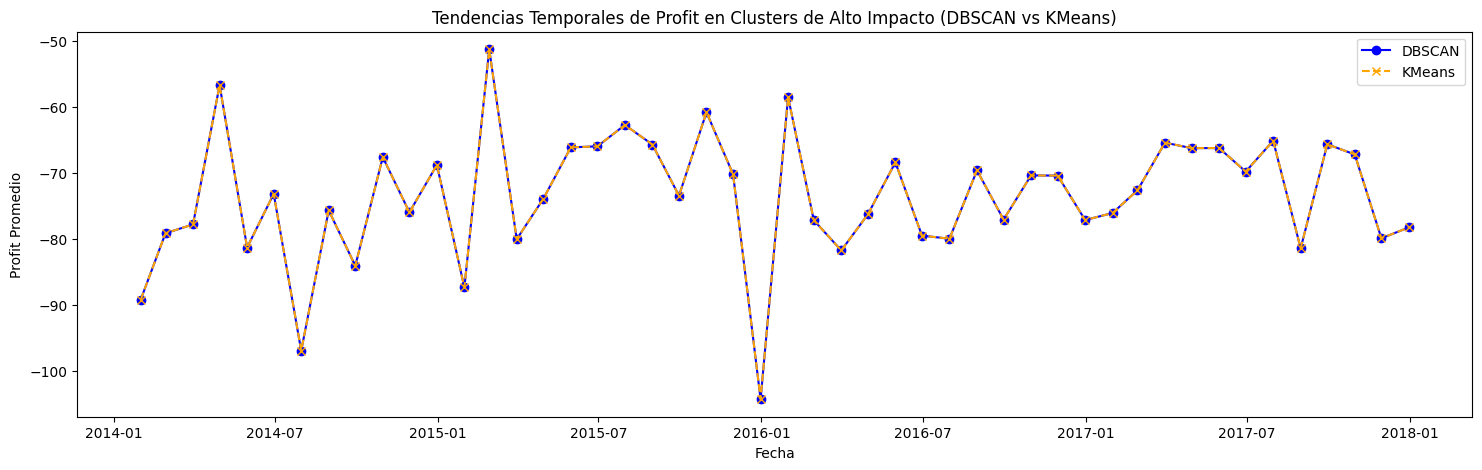

In [125]:
# Resamplear y calcular el profit promedio mensual para DBSCAN
dbscan_resampled = high_impact_clusters_db.set_index('Order Date_y').resample('M')['Profit'].mean()

# Resamplear y calcular el profit promedio mensual para KMeans
kmeans_resampled = high_impact_clusters_kmeans.set_index('Order Date_y').resample('M')['Profit'].mean()

# Crear el gráfico combinado
plt.figure(figsize=(18, 5))
plt.plot(dbscan_resampled, label='DBSCAN', color='blue', linestyle='-', marker='o')
plt.plot(kmeans_resampled, label='KMeans', color='orange', linestyle='--', marker='x')
plt.title('Tendencias Temporales de Profit en Clusters de Alto Impacto (DBSCAN vs KMeans)')
plt.ylabel('Profit Promedio')
plt.xlabel('Fecha')
plt.legend()
plt.show()


In [127]:
# Identificar los clusters con mayor impacto negativo
worst_clusters_db = cluster_analysis_db.sort_values(by='Profit').head()
worst_clusters_kmeans = cluster_analysis_kmeans.sort_values(by='Profit').head()

print("Worst clusters (DBSCAN):")
print(worst_clusters_db)

print("Worst clusters (KMeans):")
print(worst_clusters_kmeans)


Worst clusters (DBSCAN):
   DB_Cluster     Profit
1           1 -90.016196
4           4 -86.286440
3           3 -83.448042
2           2 -65.871375
0           0 -61.459290
Worst clusters (KMeans):
   KMeans_Cluster     Profit
3               3 -90.016196
0               0 -86.286440
4               4 -83.448042
1               1 -65.871375
2               2 -61.459290


In [129]:
# Analizar las características demográficas y de mercado de los clusters con mayor impacto negativo

# Para DBSCAN
for cluster in worst_clusters_db['DB_Cluster']:
    cluster_data_db = high_impact_clusters_db[high_impact_clusters_db['DB_Cluster'] == cluster]
    print(f"Características del cluster {cluster} (DBSCAN):")
    print(cluster_data_db[features].mean())

# Para KMeans
for cluster in worst_clusters_kmeans['KMeans_Cluster']:
    cluster_data_kmeans = high_impact_clusters_kmeans[high_impact_clusters_kmeans['KMeans_Cluster'] == cluster]
    print(f"Características del cluster {cluster} (KMeans):")
    print(cluster_data_kmeans[features].mean())


Características del cluster 1 (DBSCAN):
City_encoded        0.000964
State_encoded       0.006022
Country_encoded     0.024594
Market_encoded_0    0.000000
Market_encoded_1    0.000000
Market_encoded_2    1.000000
Market_encoded_3    0.000000
Market_encoded_4    0.000000
Region_encoded      0.079450
dtype: float64
Características del cluster 4 (DBSCAN):
City_encoded        0.002613
State_encoded       0.002662
Country_encoded     0.015673
Market_encoded_0    1.000000
Market_encoded_1    0.000000
Market_encoded_2    0.000000
Market_encoded_3    0.000000
Market_encoded_4    0.000000
Region_encoded      0.026734
dtype: float64
Características del cluster 3 (DBSCAN):
City_encoded        0.004160
State_encoded       0.013051
Country_encoded     0.194853
Market_encoded_0    0.000000
Market_encoded_1    0.000000
Market_encoded_2    0.000000
Market_encoded_3    0.000000
Market_encoded_4    1.000000
Region_encoded      0.049336
dtype: float64
Características del cluster 2 (DBSCAN):
City_encoded

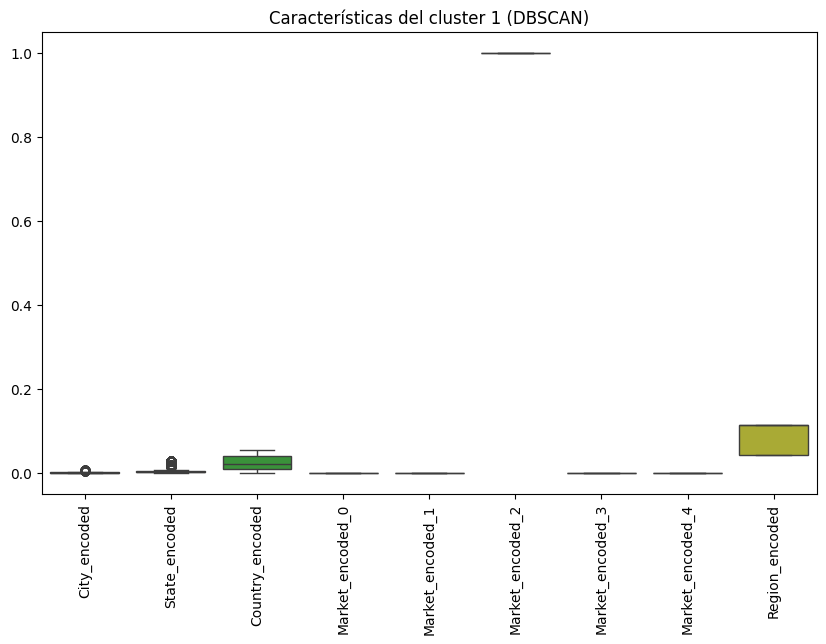

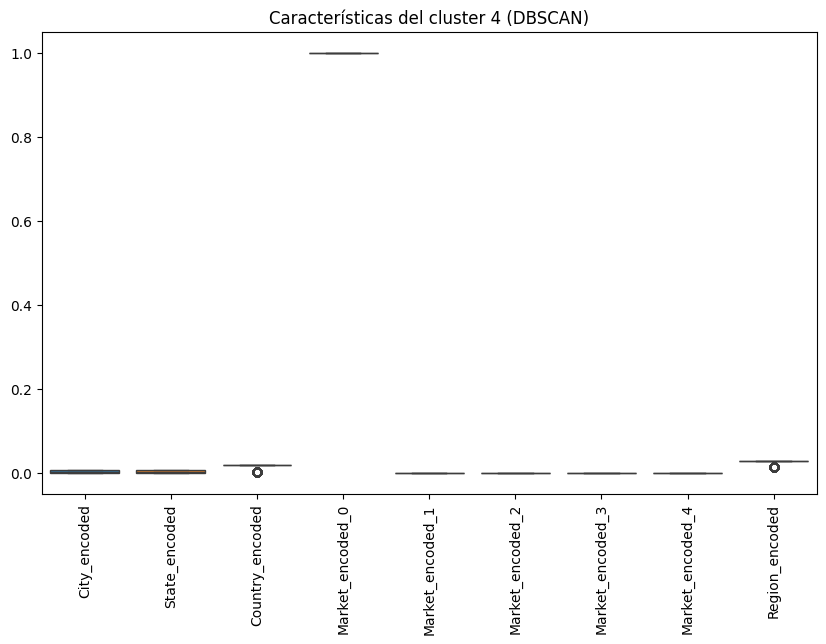

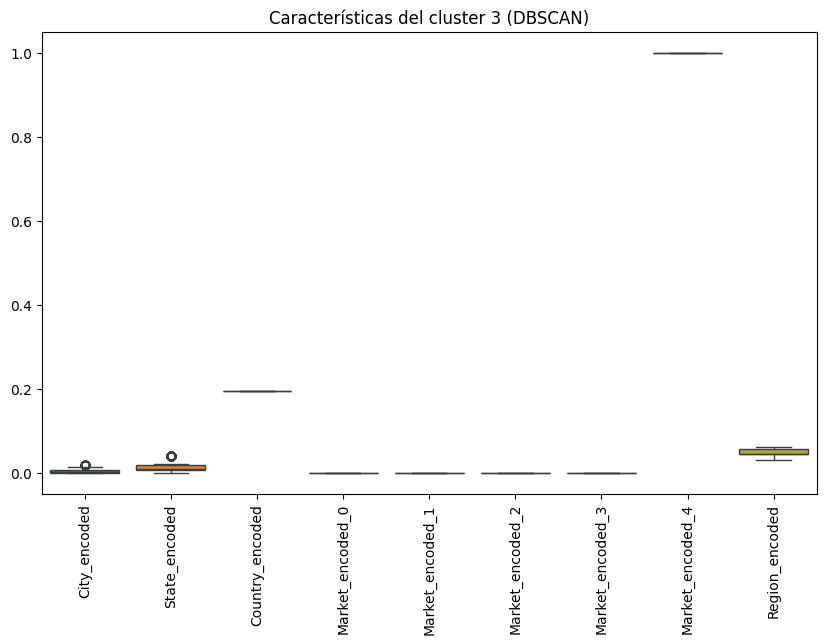

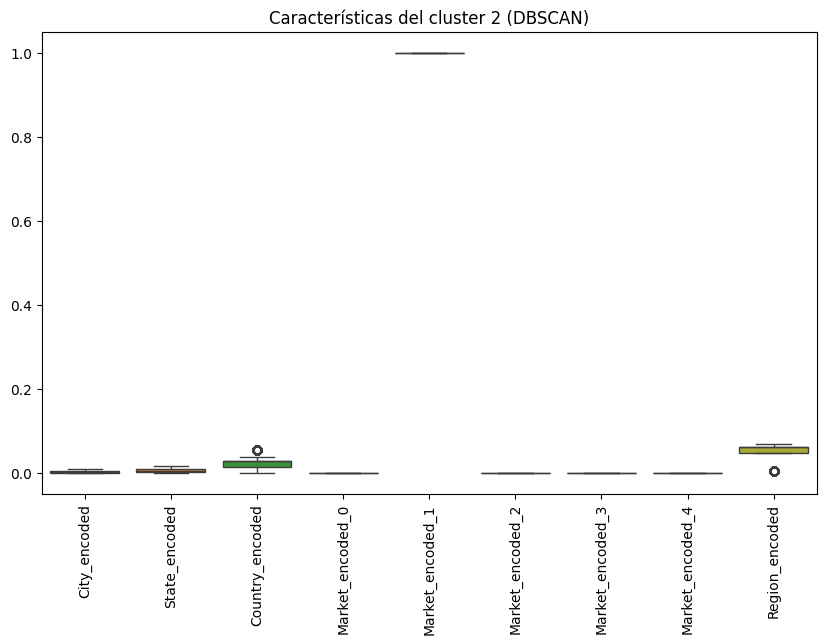

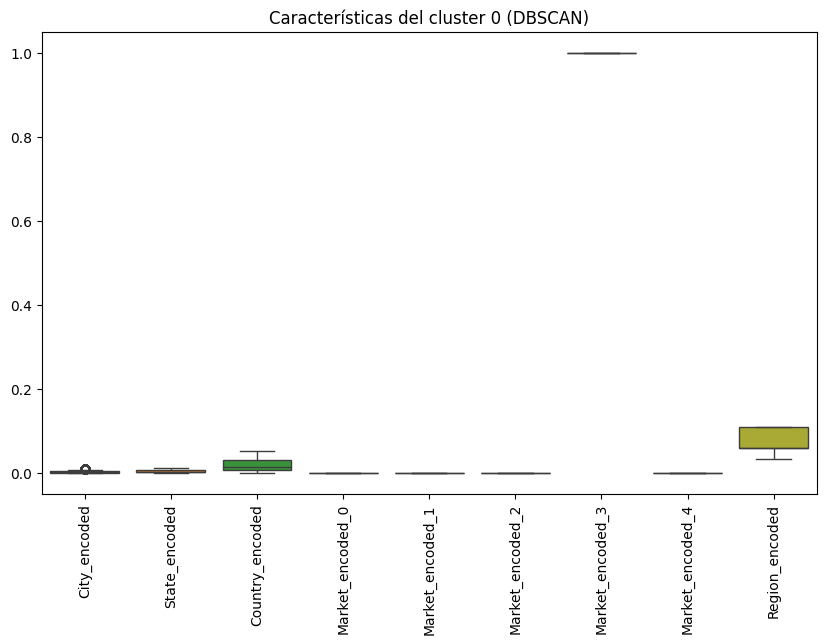

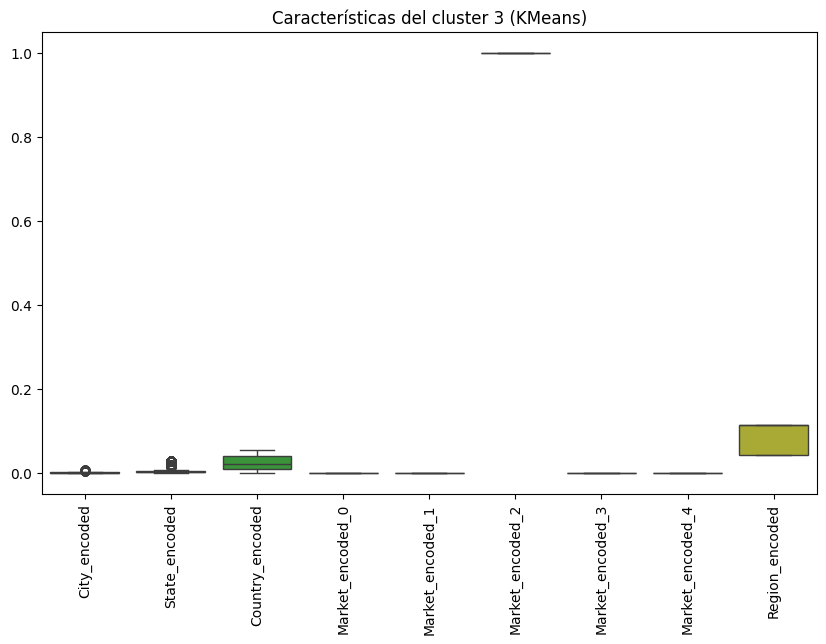

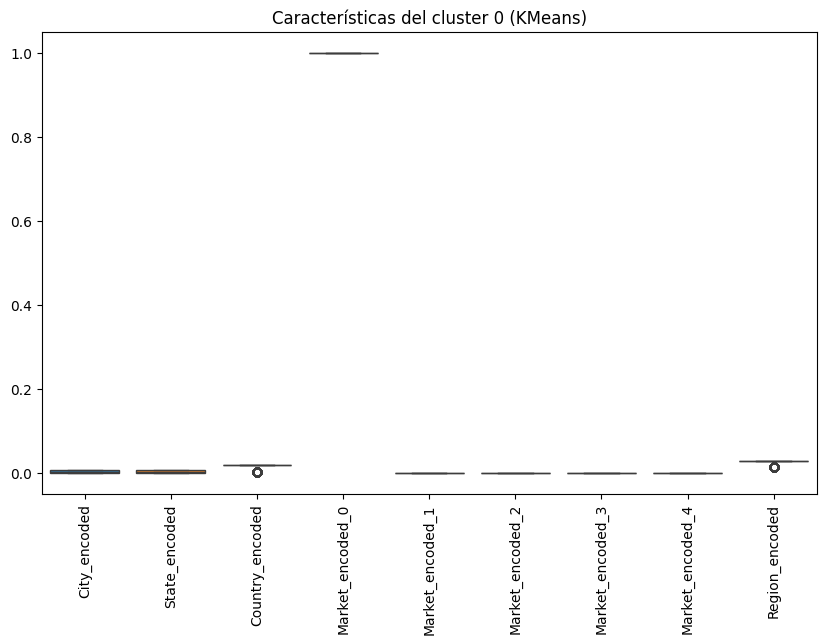

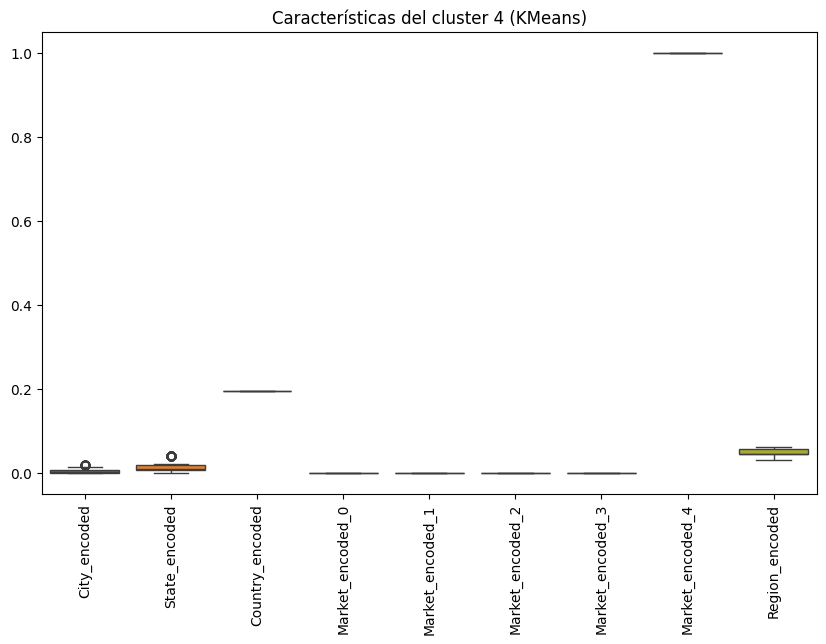

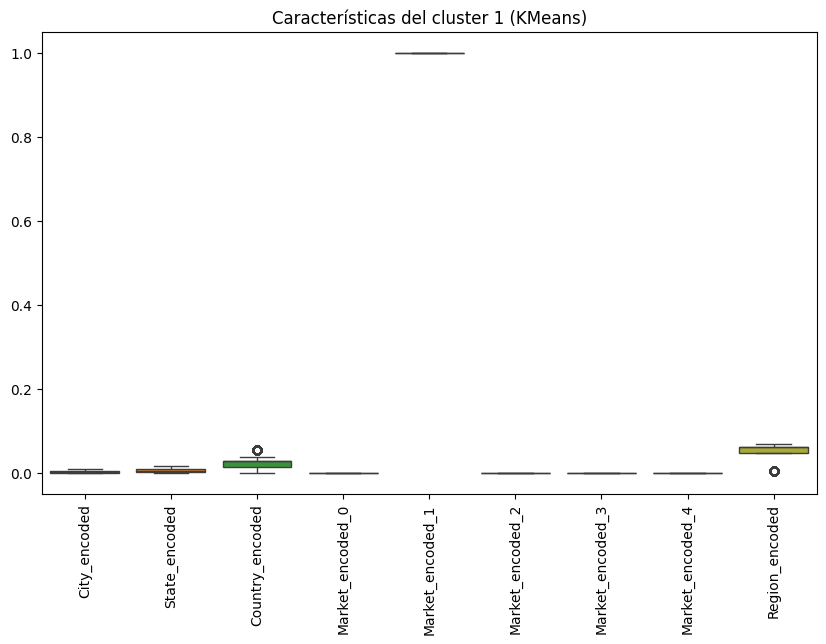

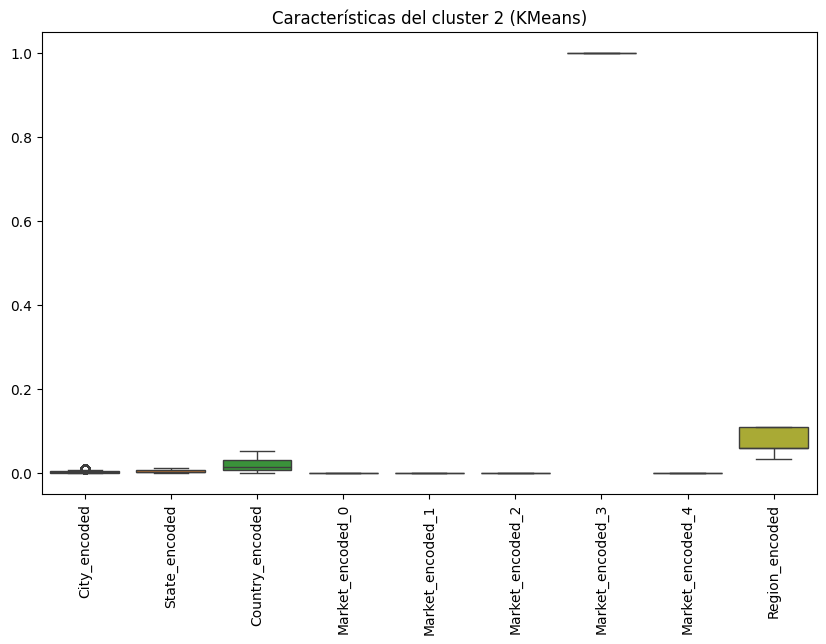

In [130]:
# Visualizar las características de los clusters para DBSCAN
for cluster in worst_clusters_db['DB_Cluster']:
    cluster_data_db = high_impact_clusters_db[high_impact_clusters_db['DB_Cluster'] == cluster]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=cluster_data_db[features])
    plt.title(f"Características del cluster {cluster} (DBSCAN)")
    plt.xticks(rotation=90)
    plt.show()

# Visualizar las características de los clusters para KMeans
for cluster in worst_clusters_kmeans['KMeans_Cluster']:
    cluster_data_kmeans = high_impact_clusters_kmeans[high_impact_clusters_kmeans['KMeans_Cluster'] == cluster]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=cluster_data_kmeans[features])
    plt.title(f"Características del cluster {cluster} (KMeans)")
    plt.xticks(rotation=90)
    plt.show()
